In [1]:
import numpy as np
import pandas as pd
import json
import tensorflow as tf
from PIL import Image

from prediction_utils import predict_proba
from shufflenet import get_shufflenet

In [2]:
# this file is created after training is finished
config_path = 'logs/run0/model_config.txt'

# folder where validation dataset is
validation_images = '/home/ubuntu/data/tiny-imagenet-200/validation/'

# this file is created when you run `image_dataset_to_tfrecords.py`
class_encoder_path = '/home/ubuntu/data/tiny-imagenet-200/class_encoder.npy'

# this file comes with dataset
class_names_file = '/home/ubuntu/data/tiny-imagenet-200/words.txt'

# Load model definition

In [3]:
config = json.load(open(config_path))
graph, ops = get_shufflenet(
    groups=config['groups'], 
    complexity_scale_factor=config['complexity_scale_factor']
)

# Load a couple of images

In [4]:
filenames = ['n02056570/val_1073.JPEG', 'n02106662/val_3641.JPEG', 'n01774384/val_1684.JPEG']
images = [Image.open(validation_images + name) for name in filenames]

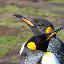

In [5]:
images[0]

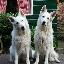

In [6]:
images[1]

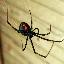

In [7]:
images[2]

# Make predictions

In [8]:
images = [image.resize((56, 56)) for image in images]
X = [np.asarray(image).astype('float32') for image in images]
X = np.stack(X)  # batch
X /= 255.0  # normalize to [0, 1] range

In [9]:
predictions = predict_proba(graph, ops, X, run=config['run'])

INFO:tensorflow:Restoring parameters from saved/run0/model


# Decode classes

In [10]:
# folder name -> class name in human readable format
class_names = pd.read_csv(class_names_file, sep='\t', header=None)
names = dict(class_names.set_index(0)[1])

# folder name -> class index
encoder = np.load(class_encoder_path)[()]

# class index -> class name in human readable format
decoder = {encoder[i]: names[i] for i in encoder}

In [11]:
print([decoder[i] for i in predictions.argmax(1)])

['king penguin, Aptenodytes patagonica', 'fur coat', 'black widow, Latrodectus mactans']
